<center style="font-family:cursive;"><h1 style="font-size:350%; padding: 20px; background: #001f3f;"><b style="color:orange;">DRUGS REVIEW - SENTIMENT ANALYSIS</b></h1></center>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 10px; background: #001f3f;"><b style="color:orange;">ABOUT NOTEBOOK</b></h1></center>


<p style="font-size:150%;">The objective of this Notebook is to predict the sentiment of the drug Users, according to their reviews and various other features like the condition they are suffering from, the rating of the drug used, Date of the usage, and others.</p>

<h1 style="font-size:180%; color:navy;"><i><b>Steps Performed</b></i></h1>

<ul>
    <li style="font-size:150%;">DESCRIPTIVE STATISTICS</li>
    <li style="font-size:150%;">DATA VISUALIZATION</li>
    <li style="font-size:150%;">DATA PREPROCESSING & FEATURE ENGINEERING</li>
    <li style="font-size:150%;">LIGHT GBM MODEL BUILDING</li>
</ul>

<h1 style="font-size:180%; color:navy;"><i><b>About Dataset</b></i></h1>

<ul>
    <li style="font-size:150%;">The Drug Review Dataset is taken from the UCI Machine Learning Repository. This Dataset provides patient reviews
on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The Drug Review Data Set is of shape (161297, 7) i.e. It has 7 features including the review and 161297 Data Points or entries. </li>
    <li style="font-size:150%;">The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful. </li>
    <li style="font-size:150%;">Here the sentiment of the review is the target variable that needs to be predicted. here we can notice that the sentiment of any review is not given, so we have to give the sentiment to the rating first and then use it as the target variable. </li>
</ul>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><b style="color:orange;">Let's Start the Implementation</b></h1></center>

<h1 style="font-size:200%; color:navy;"><i><b>Import Required Libraries and Load Dataset</b></i></h1>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drugsComTrain_raw.csv')
test = pd.read_csv('/content/drugsComTest_raw.csv')
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
# as both the dataset contains same columns we can combine them for better analysis

data = pd.concat([df, test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


<h1 style="font-size:200%; color:navy;"><i><b>Descriptive Statistics</b></i></h1>

In [4]:
# describing the data

data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [5]:
# taking out information from the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [6]:
# get the datatype of columns

data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [7]:
# checking if the data contains any NULL values

data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA VISUALIZATION</b></i></h1></center>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF DRUG NAMES / RATINGS / CONDITIONS</b></i></h1>

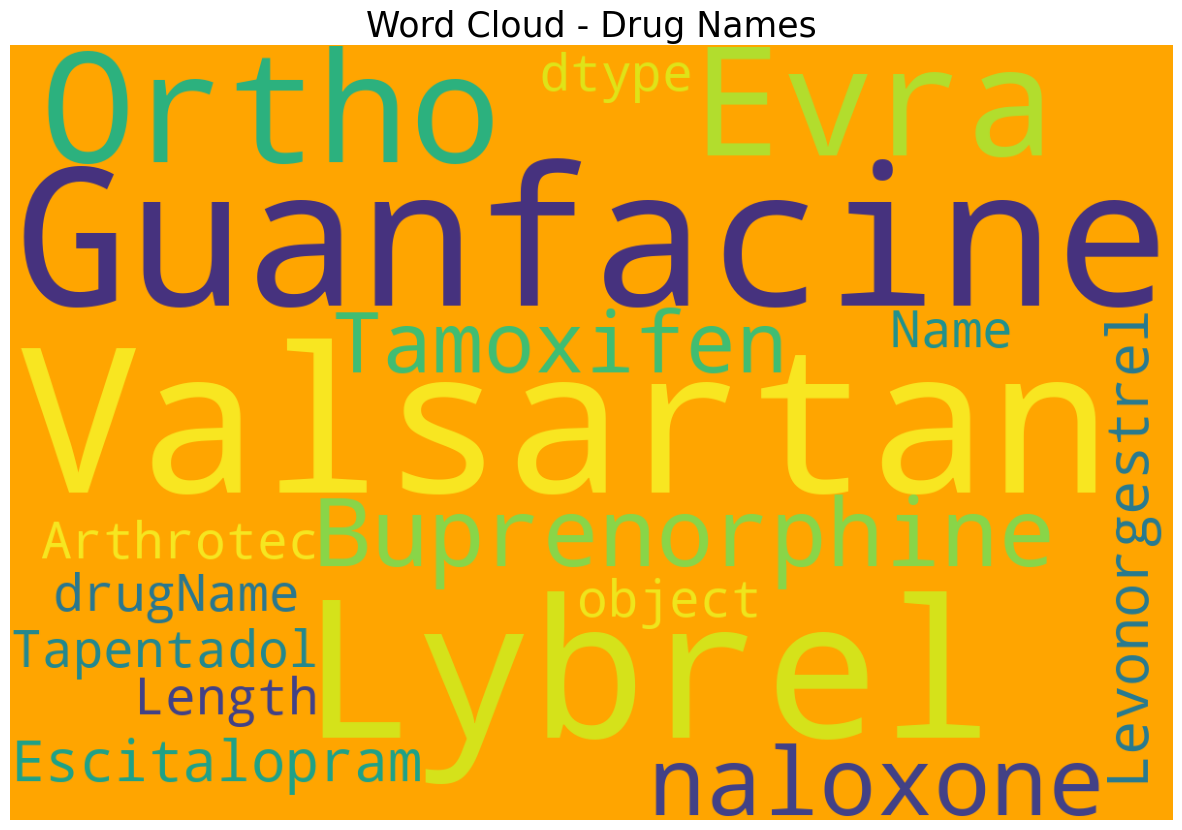

In [8]:
# let's see the words cloud for the reviews

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the DRUG NAMES </li>
<ul>

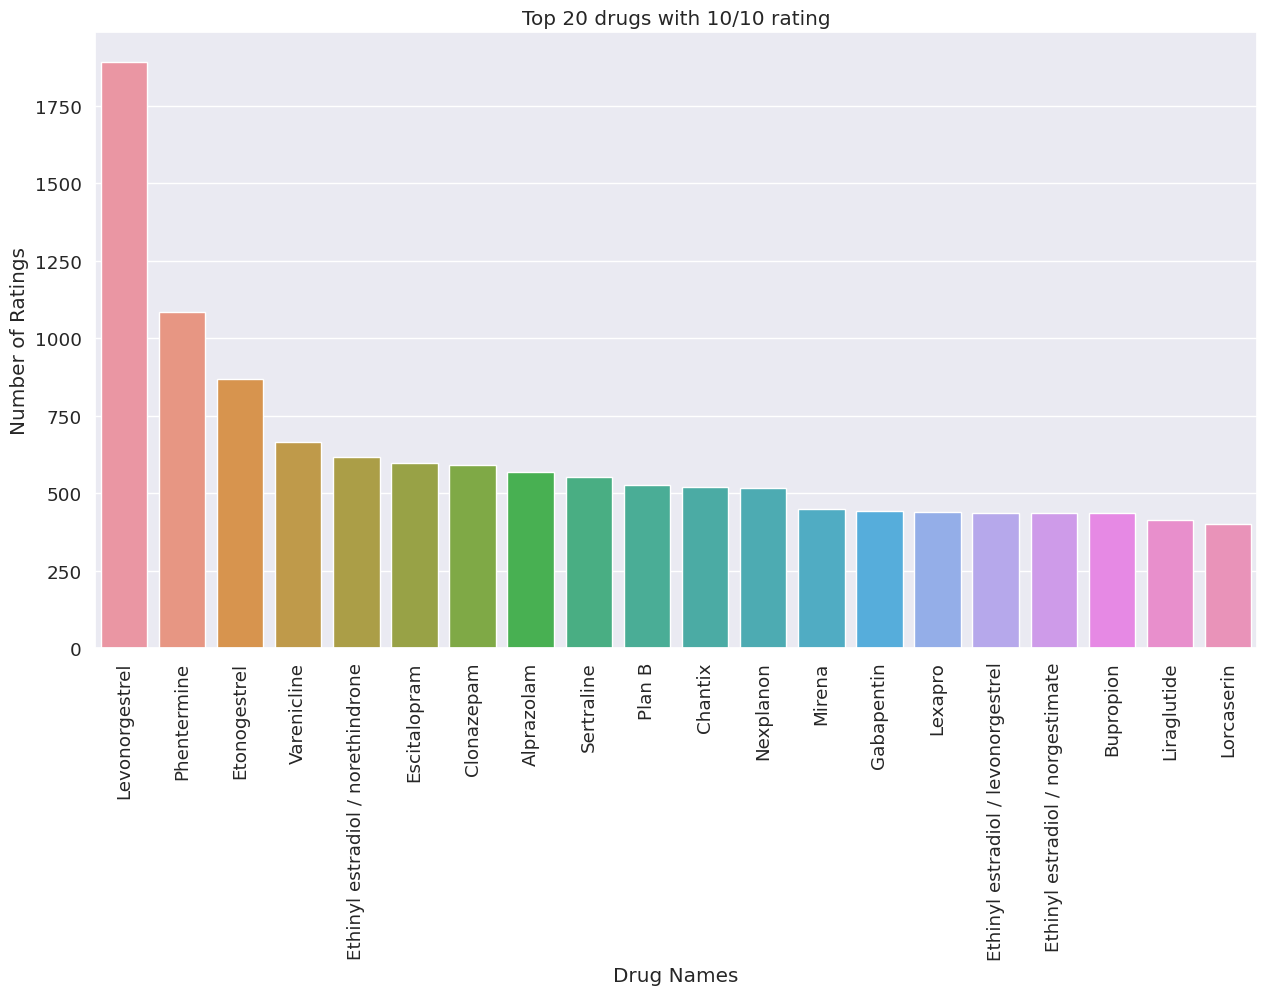

In [9]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Levonorgestrel' is the drug with the highest number of 10/10 ratings, about 1883 Ratings in the data set for 'Levonorgestrel'. </li>
<ul>

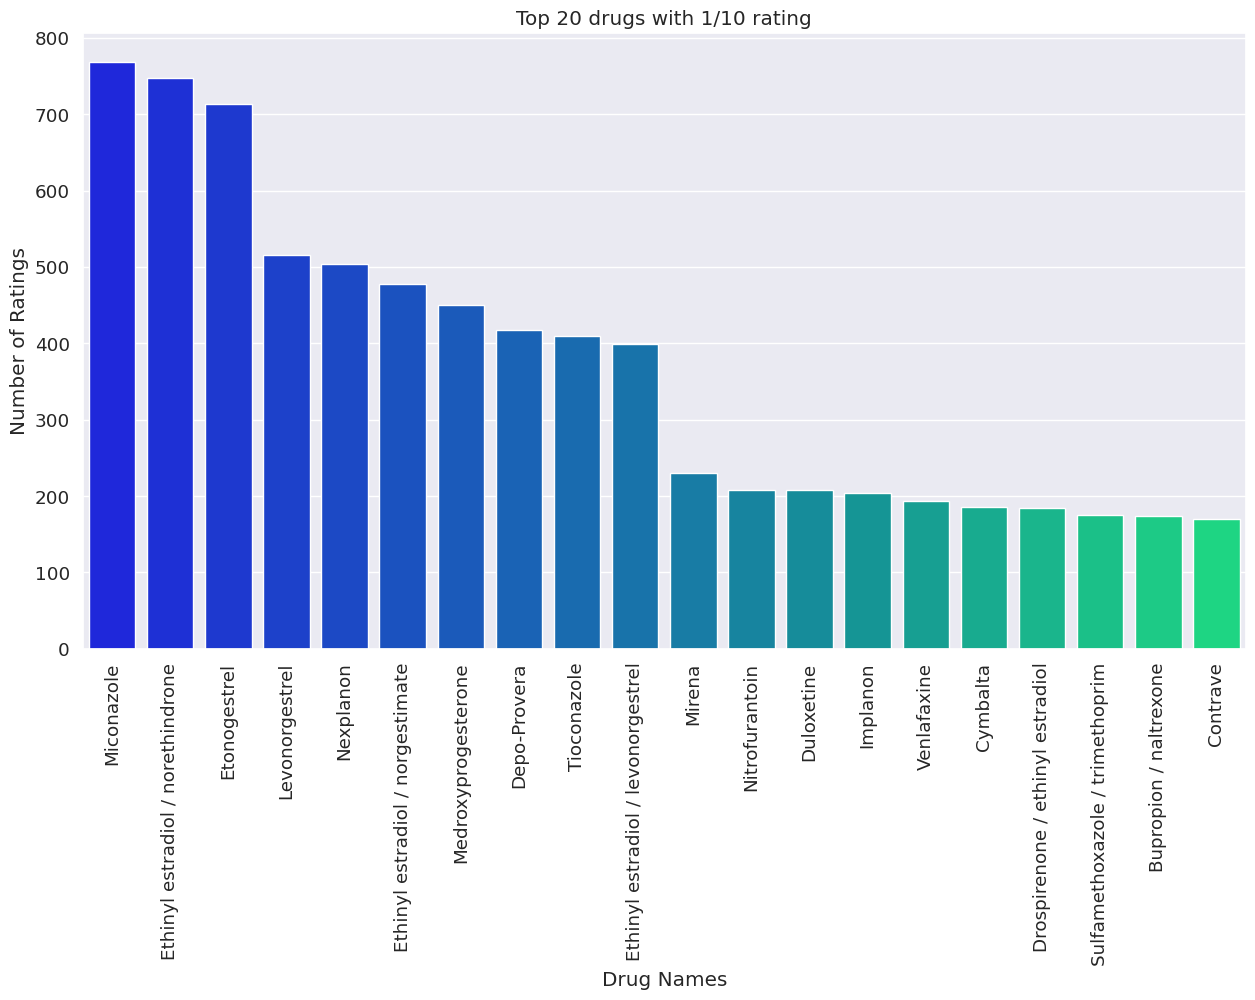

In [10]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph thatshows the top 20 drugs given in the data set with a rating of 1/10. 'Miconazole' is the drug with the highest number of 1/10 ratings, about 767. </li>
<ul>

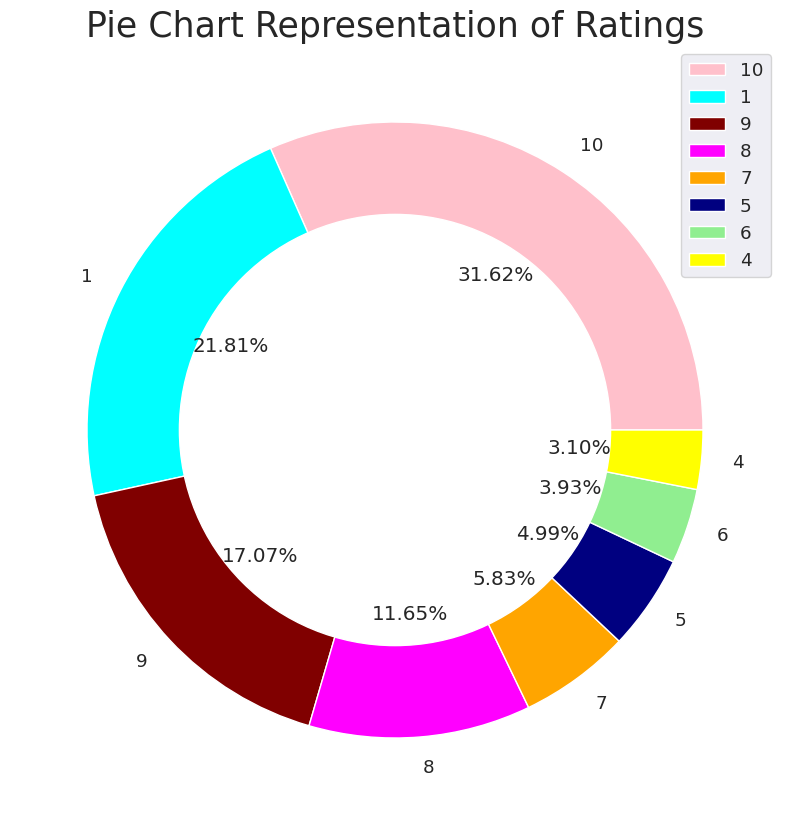

In [11]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart reprents the Rating of Reviews. </li>
<ul>

<ipython-input-12-ccdc7d5eb5e7>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_2 = sns.distplot(data['rating'], ax=ax[1])


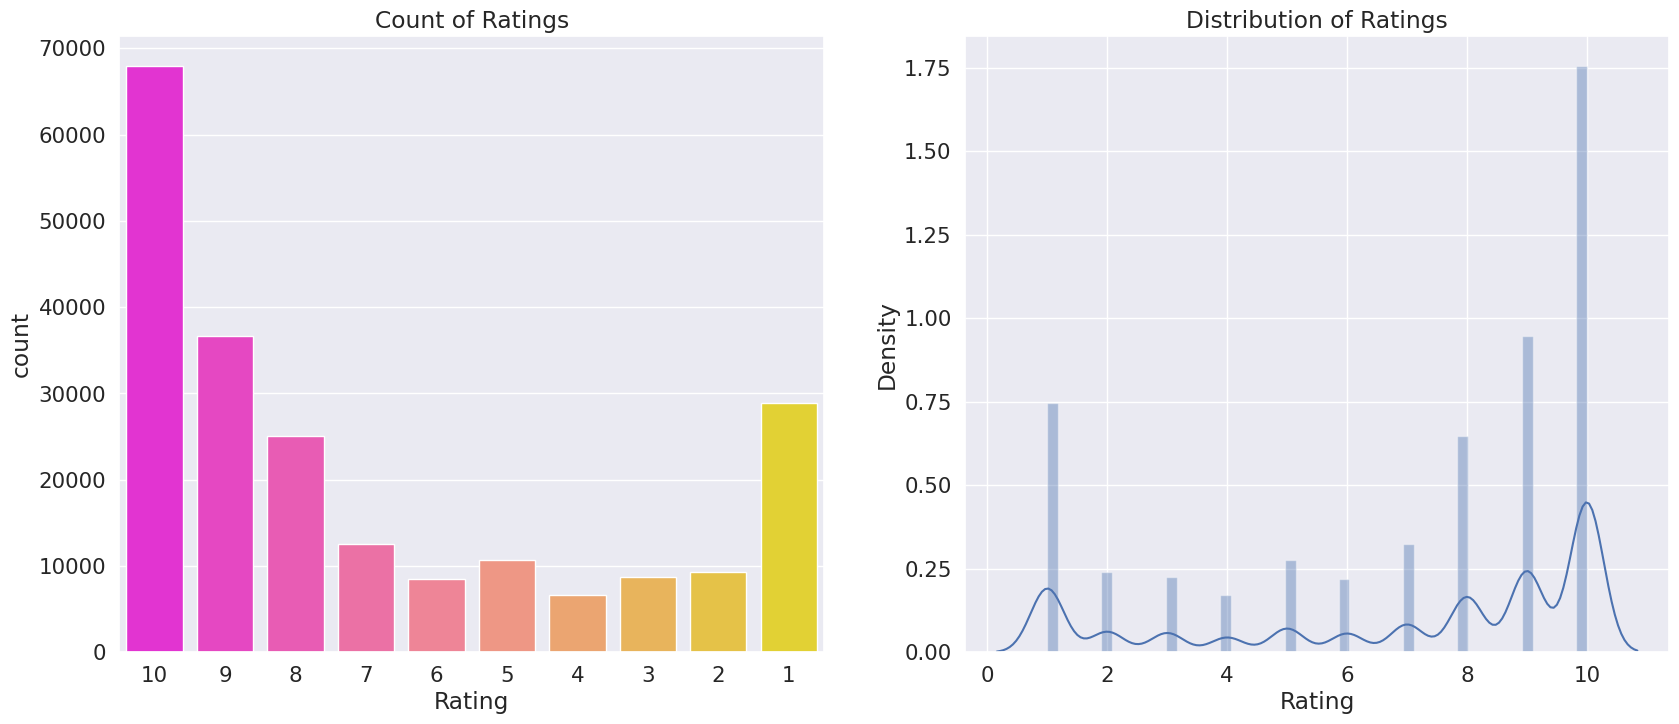

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'data' is a pandas DataFrame
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)

# Check if 'rating' is a column in the DataFrame
if 'rating' in data.columns:
    # Set plot size and style
    plt.rcParams['figure.figsize'] = [20, 8]
    sns.set(font_scale=1.4, style='darkgrid')

    # Create subplots
    fig, ax = plt.subplots(1, 2)

    # Create countplot
    sns_1 = sns.countplot(x='rating', data=data, palette='spring', order=sorted(data['rating'].unique(), reverse=True), ax=ax[0])
    sns_1.set_title('Count of Ratings')
    sns_1.set_xlabel("Rating")

    # Create distribution plot
    sns_2 = sns.distplot(data['rating'], ax=ax[1])
    sns_2.set_title('Distribution of Ratings')
    sns_2.set_xlabel("Rating")

    plt.show()
else:
    print("Error: 'rating' column not found in the data")


<ul>
    <li style="font-size:150%;">The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.</li>
<ul>

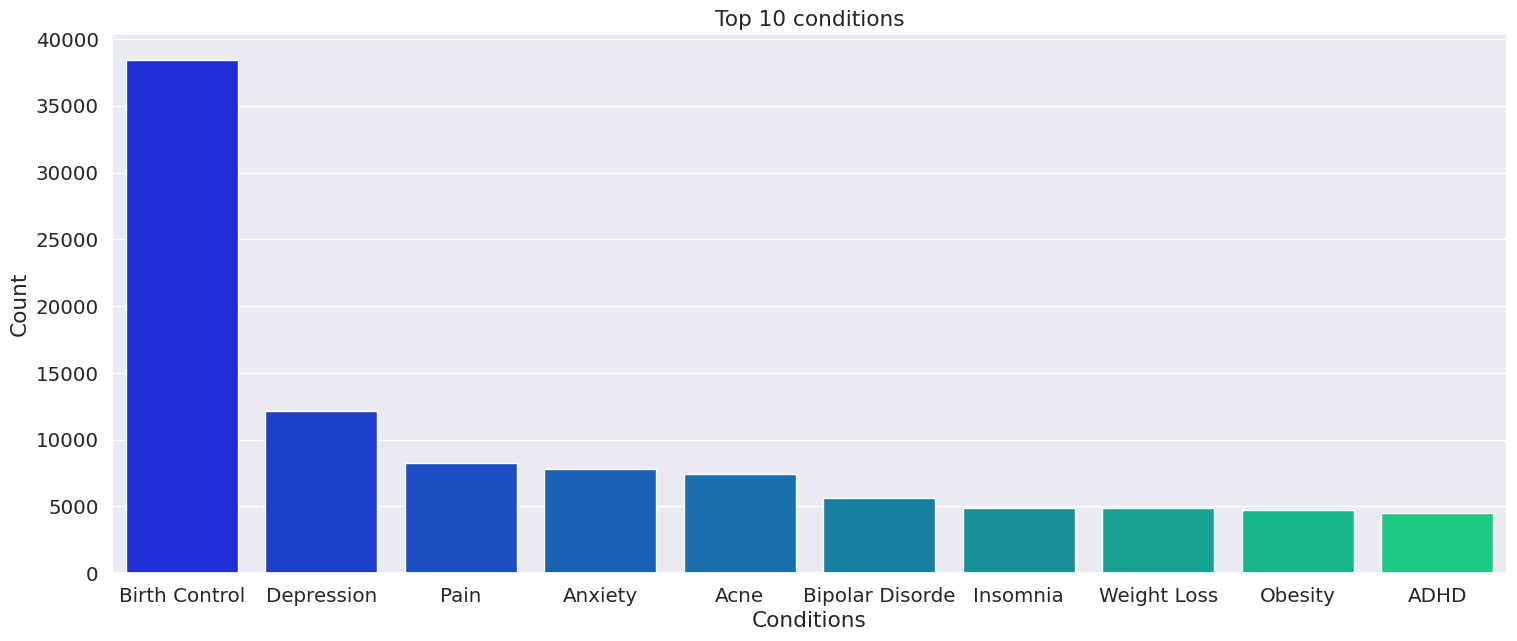

In [13]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

<ul>
    <li style="font-size:150%;">The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.</li>
<ul>

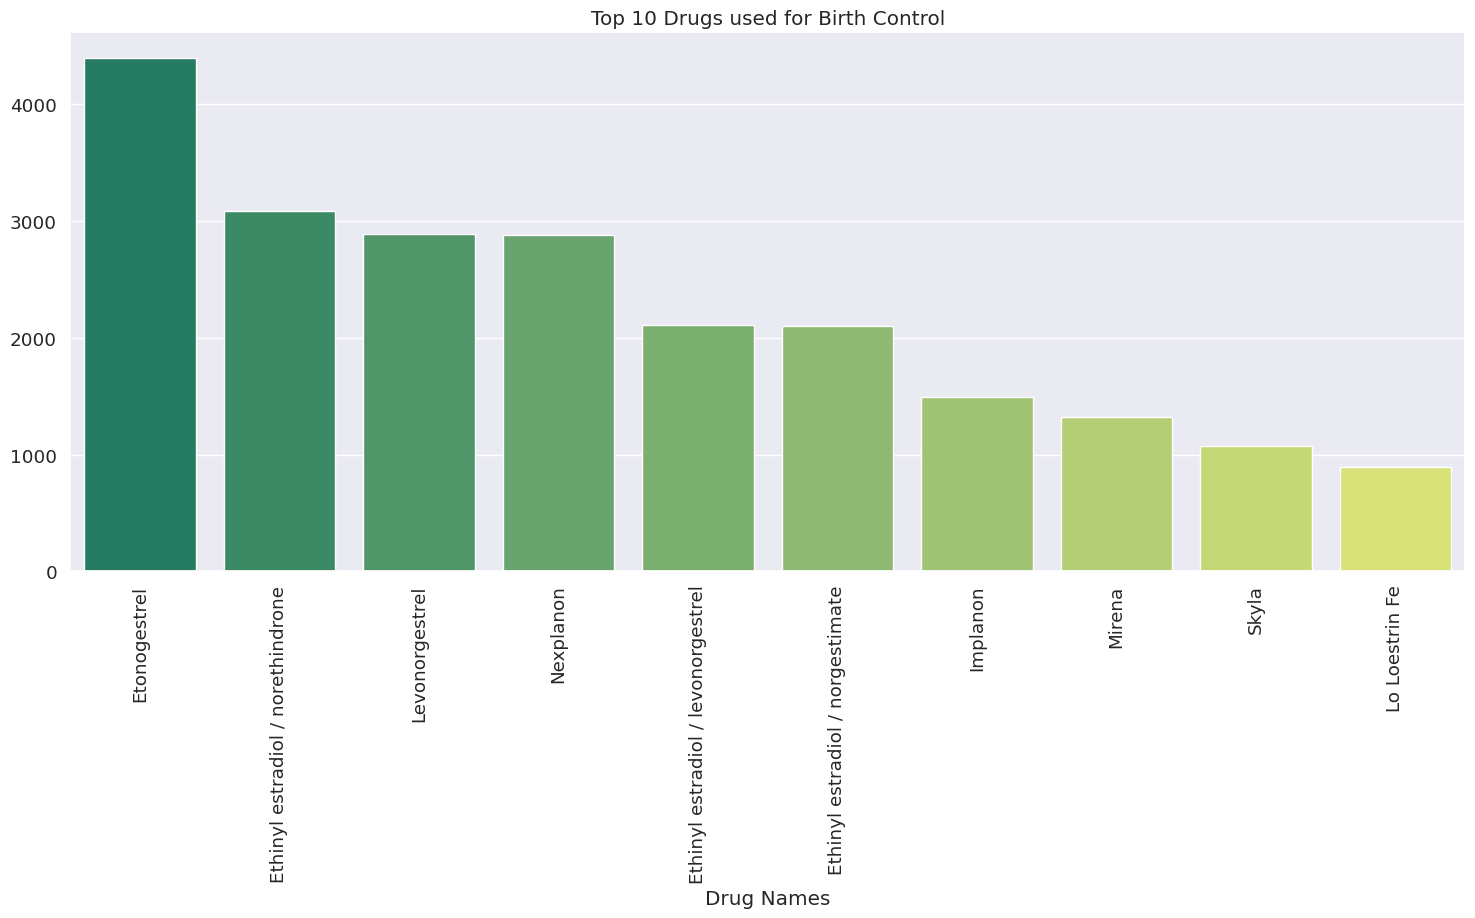

In [14]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<ul>
    <li style="font-size:150%;">The is a bar graph which exhibits the top 10 drug names for the people suffering from Birth Control. In this data set 'Etonogestrel' is the most prominent drug by a very big margin.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF REVIEWS</b></i></h1>

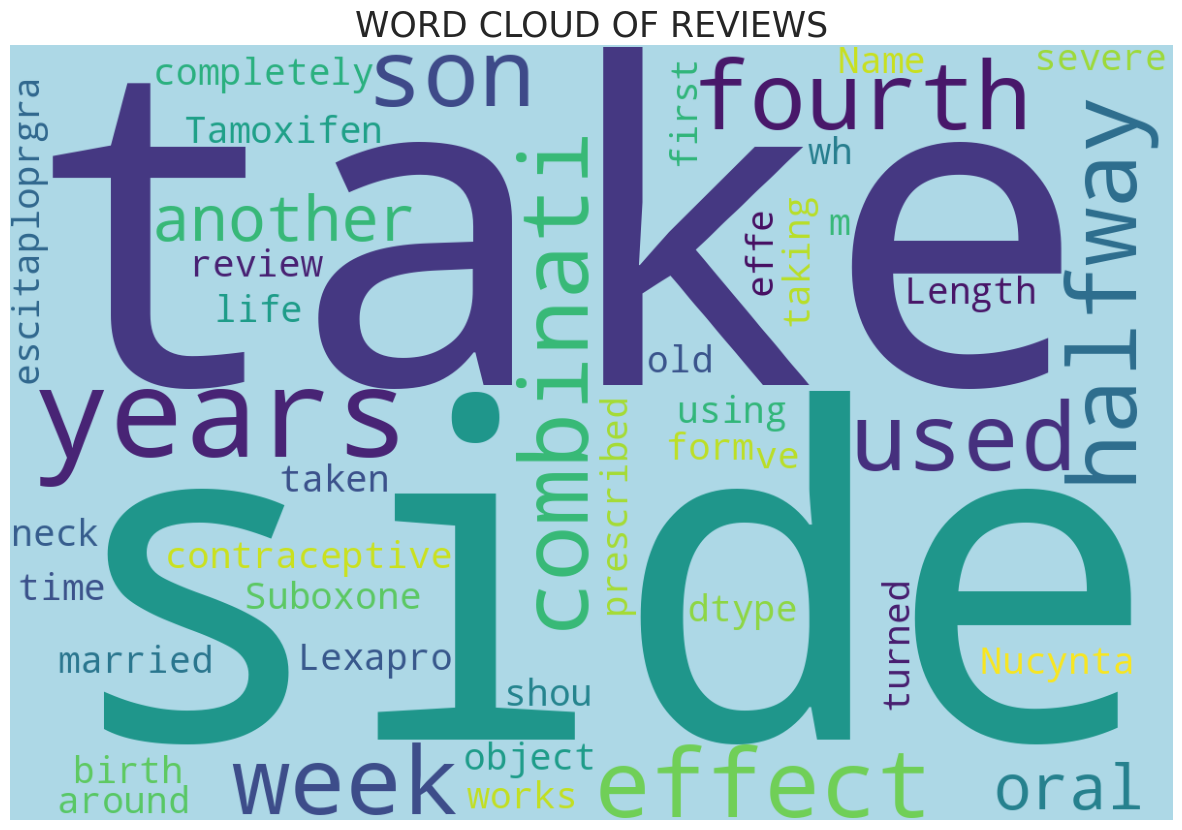

In [15]:
# let's see the words cloud for the reviews

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the reviews.</li>
<ul>

In [16]:
# feature engineering
# let's make a new column review sentiment

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

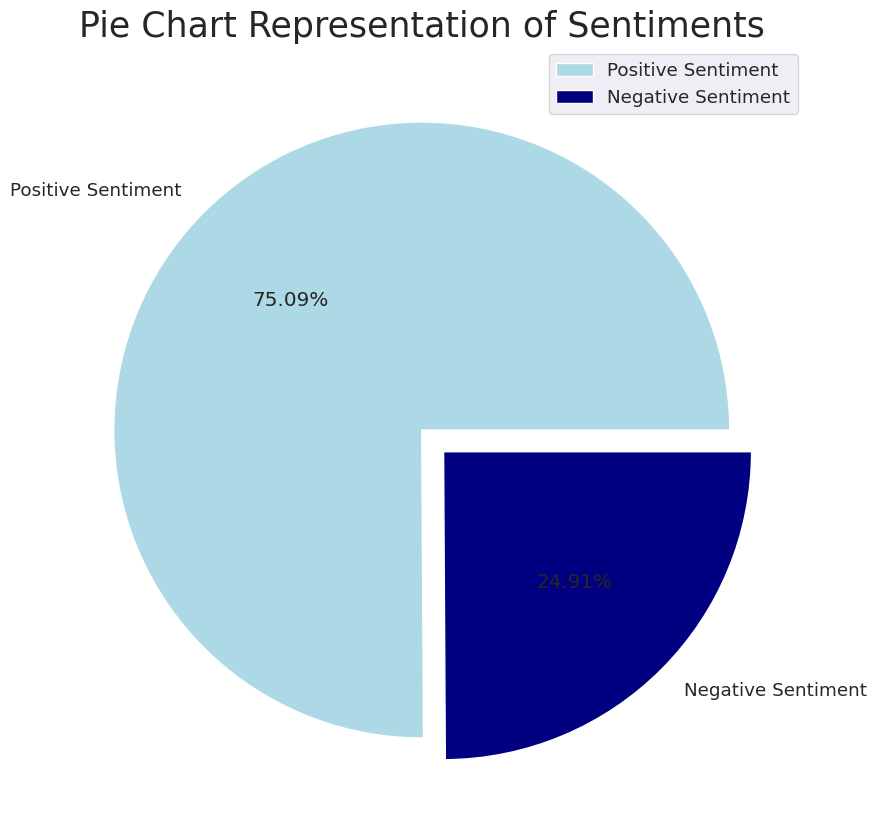

In [17]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart represents the Sentiments of the Reviews.</li>
<ul>

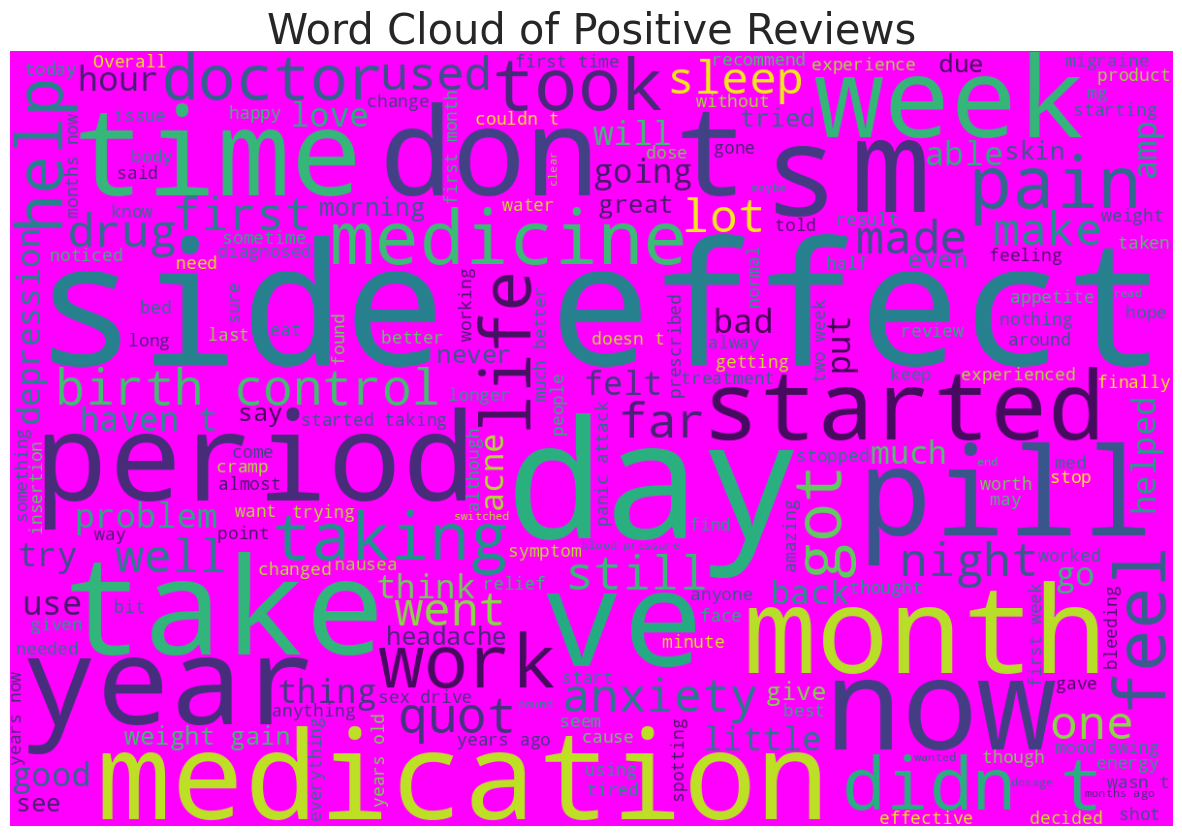

In [18]:

# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the Positive Sentiments.</li>
<ul>

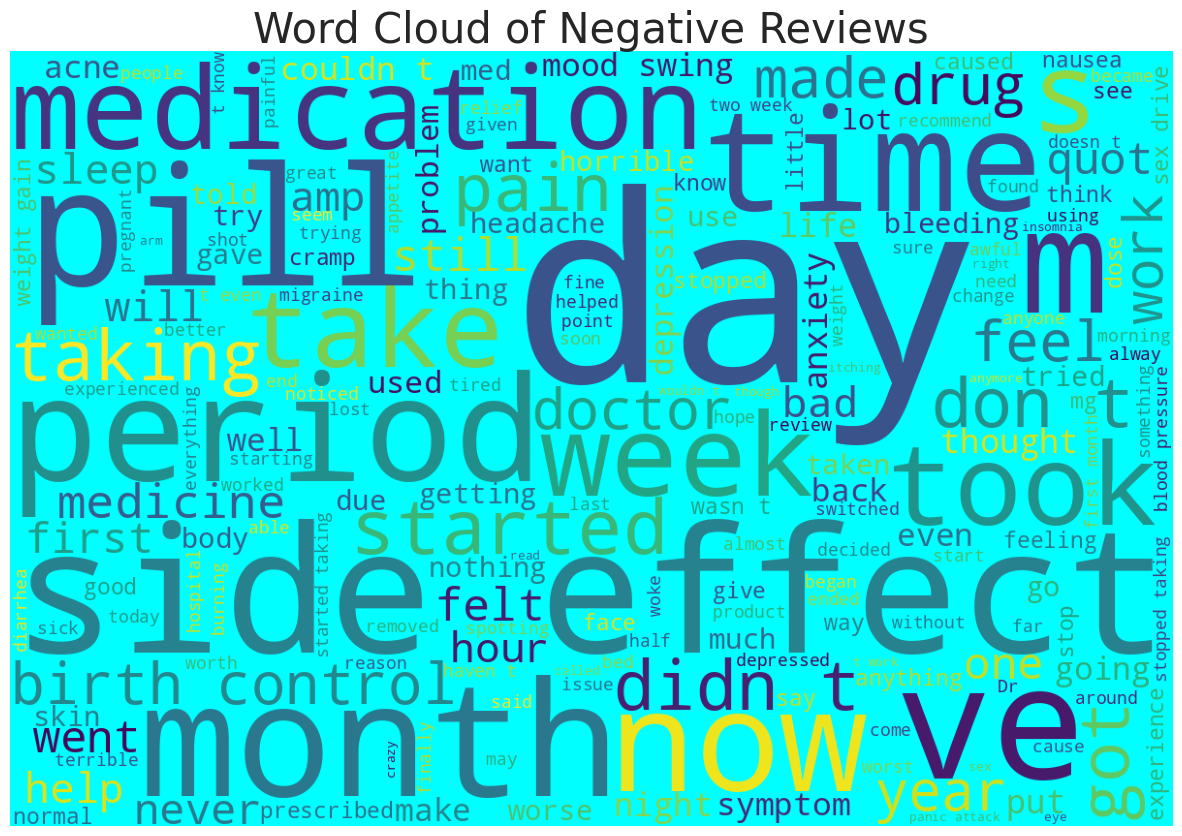

In [19]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the Negative Sentiments.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF REVIEWS BASED ON DATETIME</b></i></h1>

In [20]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

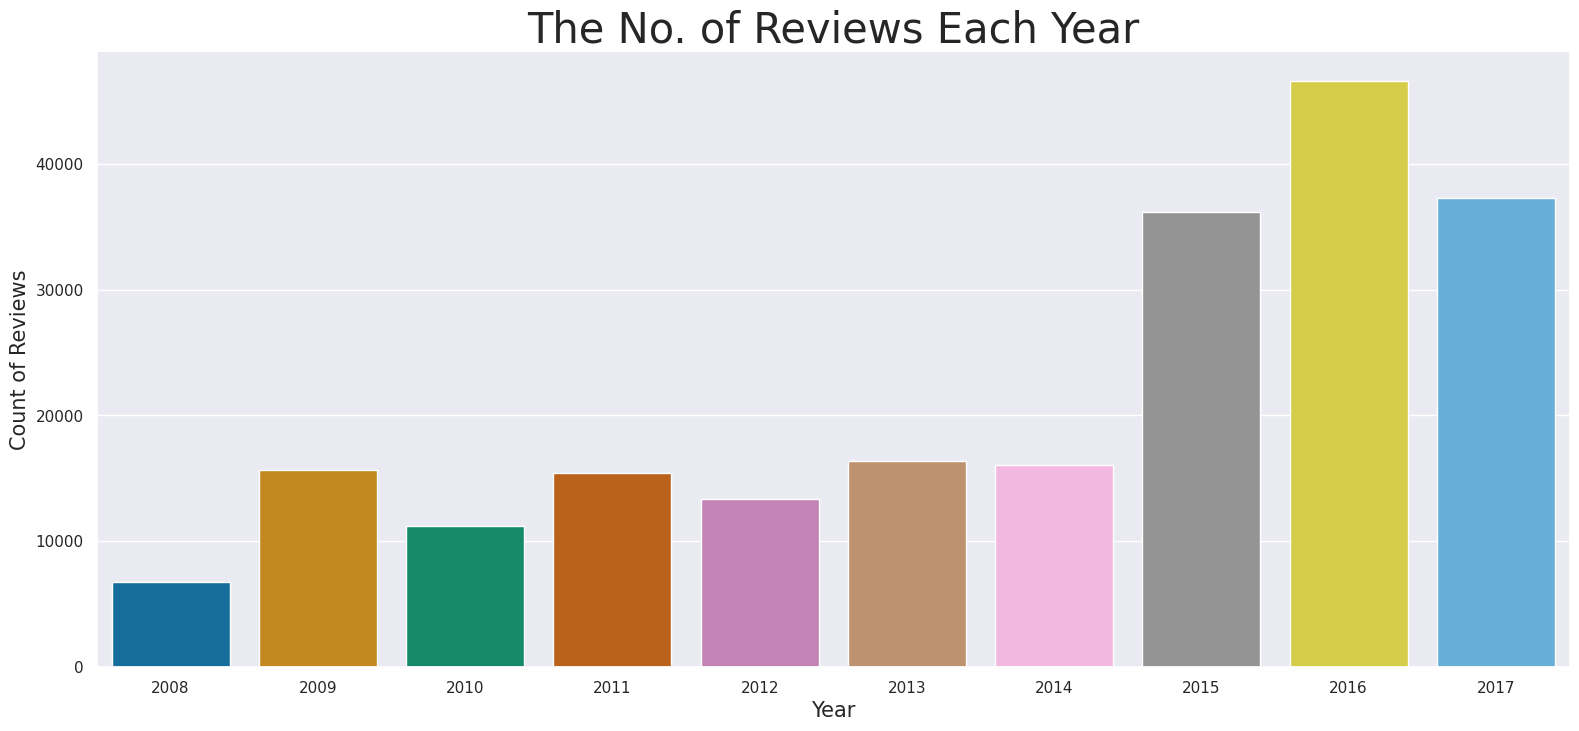

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'data' is a DataFrame
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)

# Check if 'Year' is a column in the DataFrame
if 'Year' in data.columns:
    # Set plot size and style
    plt.rcParams['figure.figsize'] = (19, 8)
    sns.set(style="darkgrid")

    # Create countplot
    sns.countplot(x='Year', data=data, palette='colorblind')
    plt.title('The No. of Reviews Each Year', fontsize=30)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Count of Reviews', fontsize=15)

    plt.show()
else:
    print("Error: 'Year' column not found in the data")


<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per year. It can be inferred that most ratings are given in 2016 and 2008 has the least number of reviews.</li>
<ul>

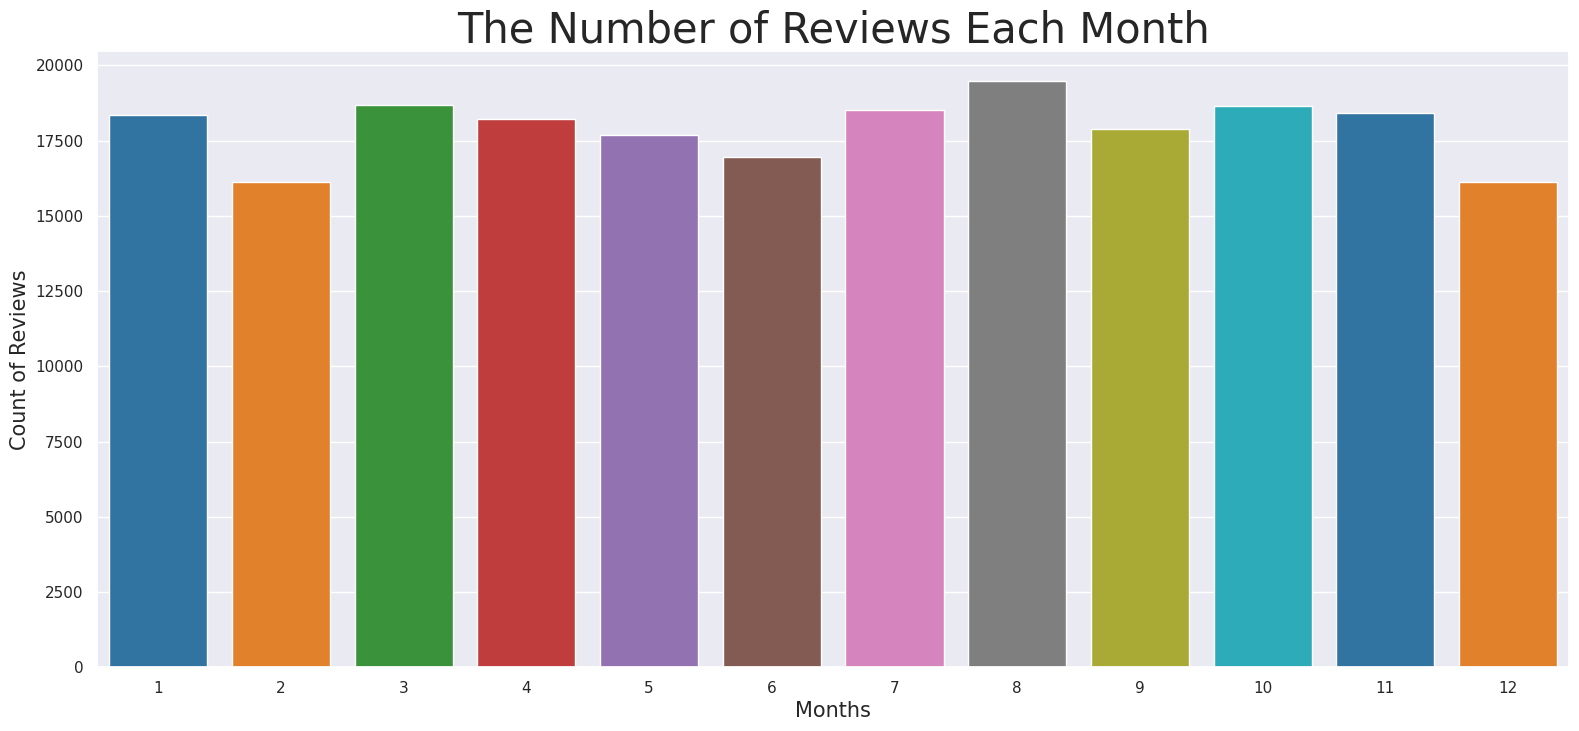

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'data' is a DataFrame
if isinstance(data, pd.DataFrame):
    # Check if 'month' is a column in the DataFrame
    if 'month' in data.columns:
        # Set plot size and style
        plt.rcParams['figure.figsize'] = (19, 8)
        sns.set(style="darkgrid")

        # Create countplot
        sns.countplot(x='month', data=data, palette='tab10')
        plt.title('The Number of Reviews Each Month', fontsize=30)
        plt.xlabel('Months', fontsize=15)
        plt.ylabel('Count of Reviews', fontsize=15)

        plt.show()
    else:
        print("Error: 'month' column not found in the data")
else:
    print("Error: Data is not a pandas DataFrame")


<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per month.</li>
<ul>

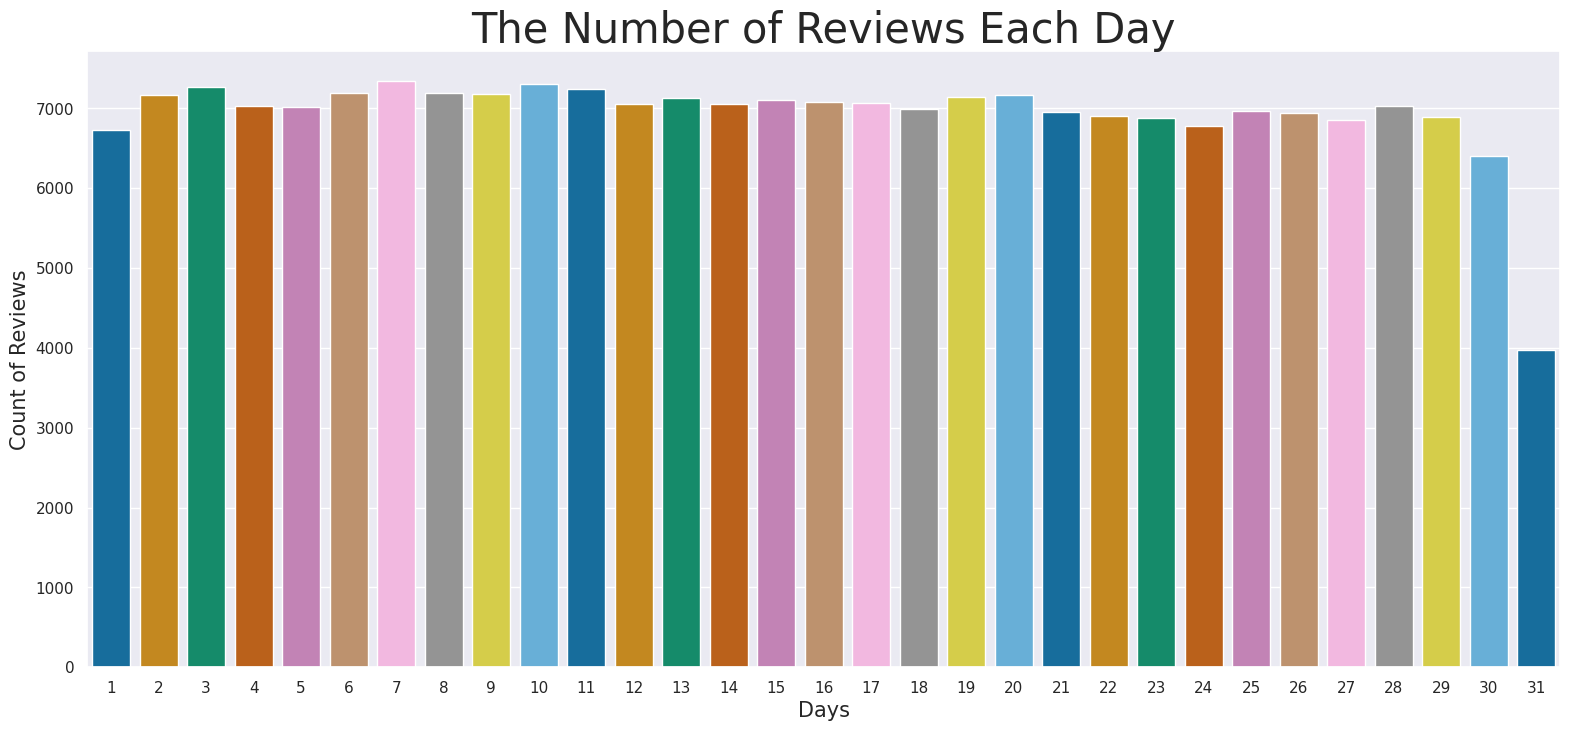

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'data' is a DataFrame
if isinstance(data, pd.DataFrame):
    # Check if 'day' column exists in 'data'
    if 'day' in data.columns:
        # Set plot size and style
        plt.rcParams['figure.figsize'] = (19, 8)
        sns.set(style="darkgrid")

        # Create countplot
        sns.countplot(x='day', data=data, palette='colorblind')
        plt.title('The Number of Reviews Each Day', fontsize=30)
        plt.xlabel('Days', fontsize=15)
        plt.ylabel('Count of Reviews', fontsize=15)

        plt.show()
    else:
        print("Error: 'day' column not found in the data")
else:
    print("Error: Data is not a pandas DataFrame")


<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per day.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF USEFUL COUNT</b></i></h1>

<ipython-input-24-946fc70368f2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['usefulCount'], color = 'orange')


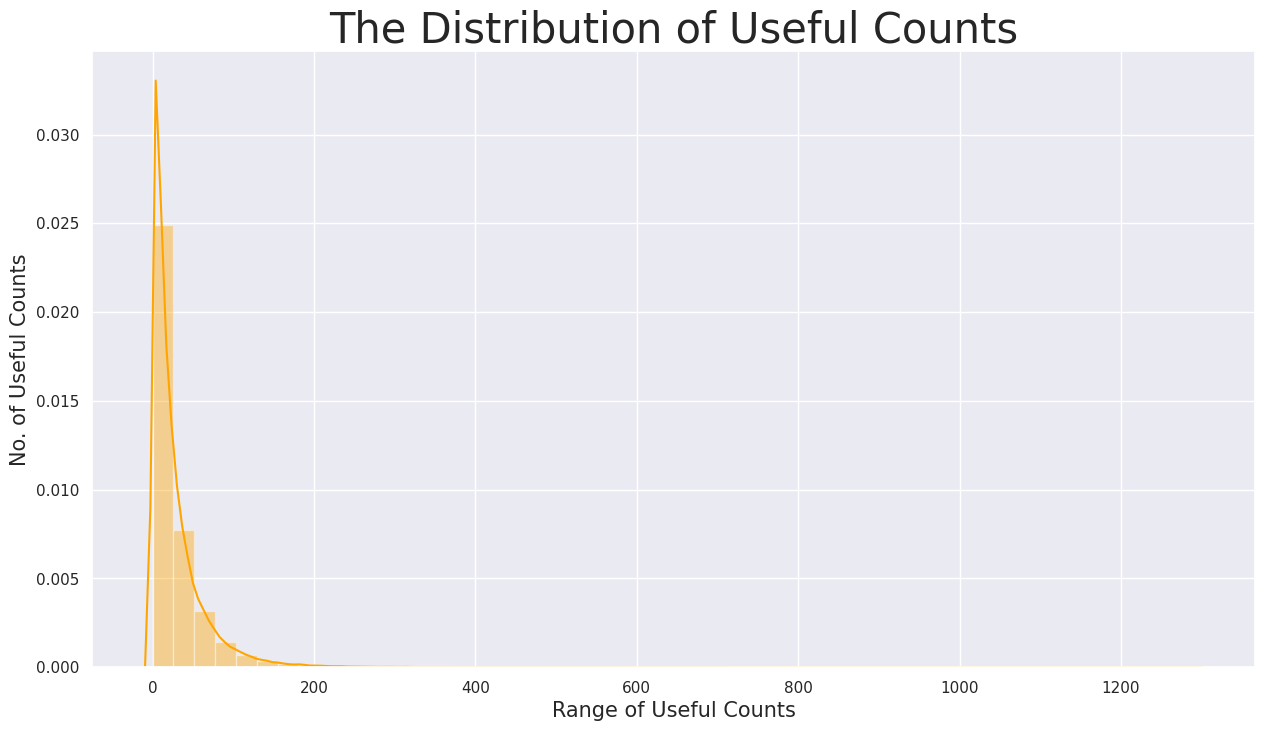

In [24]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">This shows the distribution of the useful Counts in the data set.</li>
<ul>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA PREPROCESSING / FEATURE ENGINEERING</b></i></h1></center>

In [25]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [26]:
data['review_clean'] = review_clean(data['review'])

<ipython-input-25-d74b7fad3449>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
<ipython-input-25-d74b7fad3449>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
<ipython-input-25-d74b7fad3449>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
<ipython-input-25-d74b7fad3449>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
<ipython-input-25-d74b7fad3449>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

<ul>
    <li style="font-size:150%;">I have used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned review</li>
<ul>

In [29]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [30]:
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept 21 pill cycl ha...


In [31]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [32]:
data['sentiment'] = sentiment(data['review'])

In [33]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [34]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [35]:
data = data.dropna(how="any", axis=0)

In [36]:

#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

<ul>
    <li style="font-size:150%;">The new features engineered are 'count_word' which is the number of words in each review, 'count_unique_word' which is the number of the unique words in the reviews. 'count_letters' is the letter count, 'punctuation_count' is the punctuation count, 'count_words_upper' is the upper case word count,'count_words_title' is the title case word counts, 'count_stopwords' is the number of stop words in the review, and the 'mean_word_len' is the average length of the words in the review. The date is also divided into three columns which are day, month and year for separate features for training.</li>
<ul>

In [37]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'month', 'day',
       'review_clean', 'sentiment', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len'],
      dtype='object')

<h1 style="font-size:180%; color:orange;"><i><b>CORRELATION MATRIX</b></i></h1>

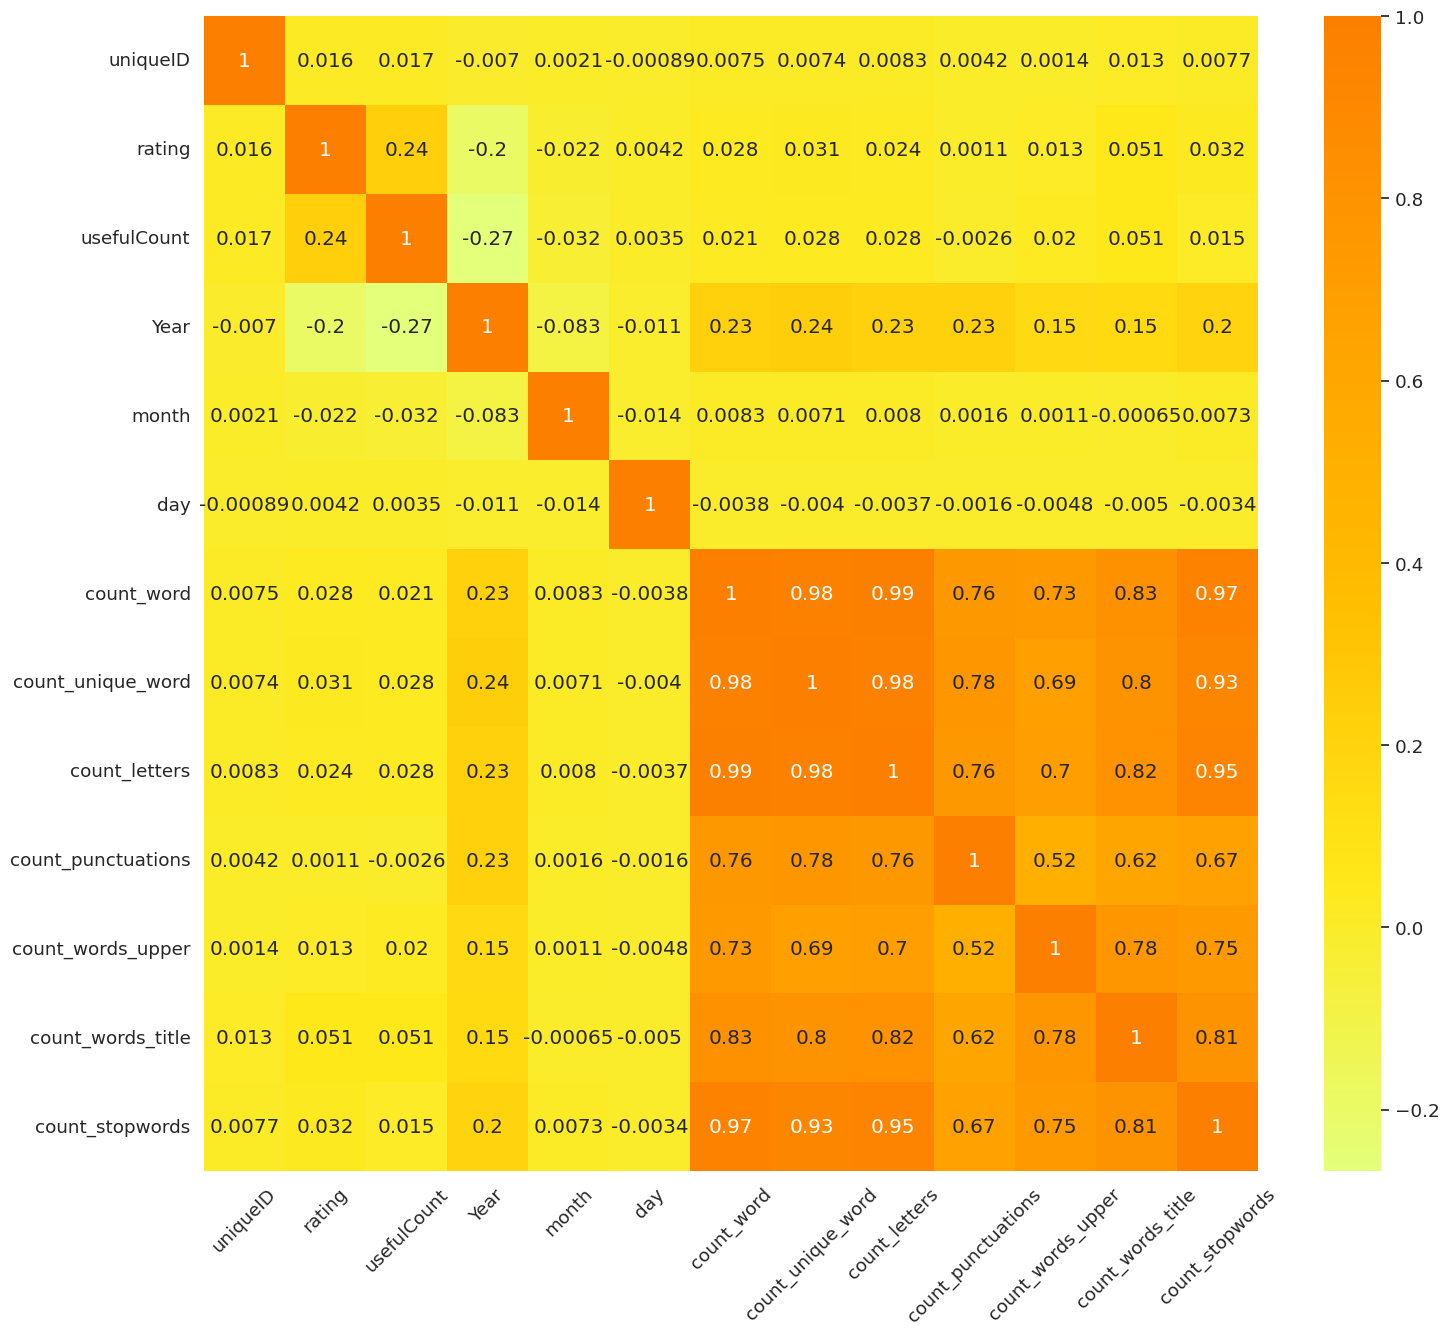

In [38]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

<ul>
    <li style="font-size:150%;">Correlation Heatmap is plotted using seaborn which contains all the new features engineered and the old features.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>LABEL ENCODING</b></i></h1>

In [39]:

# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

<ul>
    <li style="font-size:150%;">The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>LIGHT GBM MODEL</b></i></h1>

<ul>
    <li style="font-size:150%;">LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. It has many advantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.</li>
<ul>

In [40]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [41]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


<ul>
    <li style="font-size:150%;">70% of the dataset is used for the training and the rest of the data i.e. 30% is used for the testing purpose. The shape of the training set is (149708, 15) and the shape of  the test set is (64161, 15).</li>
<ul>

In [42]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.9014977946104331
The confusion Matrix is 


array([[11753,  4321],
       [ 1999, 46088]])

<ul>
    <li style="font-size:150%;">The Confusion Matrix for the LGBM model is given above, it can be seen that the accuracy of the LGBM is 0.9014 (90%).</li>
<ul>

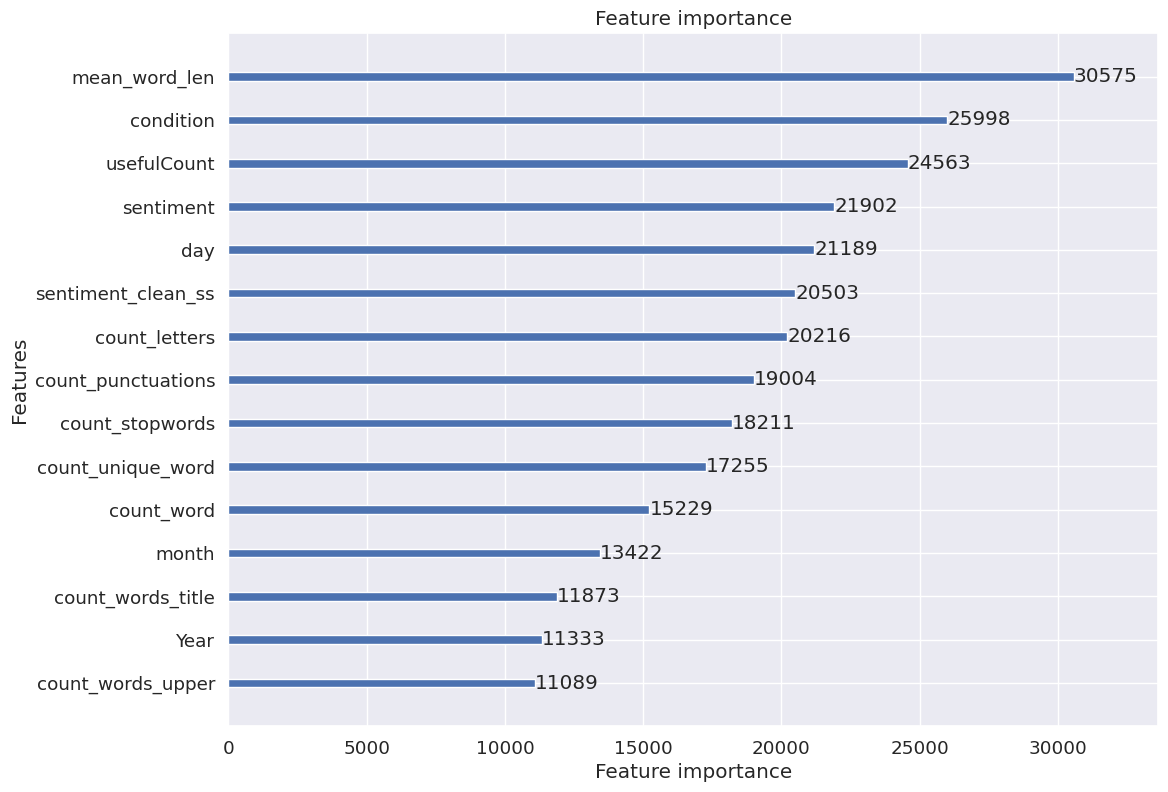

In [43]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

<ul>
    <li style="font-size:150%;">Above figure depicts the feature importance plot using the LightGBM. It can be inferred that the most importance feature is the mean word length and after that the condition of the patient. The least important feature of them all is the upper-case word count.</li>
<ul>

# Drug Review Sentiment Analysis Using LSTM - Optional Try



# Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import spacy
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

# Dataset Loader

In [45]:
import pandas as pd

class DataFrame_Loader:

    def __init__(self, error_bad_lines, sep):
        self.error_bad_lines = error_bad_lines
        self.sep = sep
        print("Loading DataFrame")

    def load_data_files(self, path):
        try:
            df = pd.read_csv(path, error_bad_lines=self.error_bad_lines, sep=self.sep)
            return df
        except pd.errors.ParserError as e:
            print(f"Error loading data: {e}")
            return None

path1 = "/content/drugsComTest_raw.csv"
load = DataFrame_Loader(False, '\t')  # Set error_bad_lines to False
df = load.load_data_files(path1)

if df is not None:
    print(df.head())
else:
    print("Failed to load data.")


Loading DataFrame
  uniqueID,drugName,condition,review,rating,date,usefulCount
0  163740,Mirtazapine,Depression,"""I&#039;ve tri...        
1  206473,Mesalamine,"Crohn's Disease, Maintenanc...        
2  159672,Bactrim,Urinary Tract Infection,"""Quic...        
3  39293,Contrave,Weight Loss,"""Contrave combine...        
4  97768,Cyclafem 1 / 35,Birth Control,"""I have ...        


Skipping line 11759: expected 1 fields, saw 2
Skipping line 11767: expected 1 fields, saw 2
Skipping line 11777: expected 1 fields, saw 2
Skipping line 11779: expected 1 fields, saw 2
Skipping line 11781: expected 1 fields, saw 2
Skipping line 11783: expected 1 fields, saw 2
Skipping line 11785: expected 1 fields, saw 2
Skipping line 11787: expected 1 fields, saw 2
Skipping line 11789: expected 1 fields, saw 2
Skipping line 11795: expected 1 fields, saw 2
Skipping line 11797: expected 1 fields, saw 2
Skipping line 11799: expected 1 fields, saw 2
Skipping line 11805: expected 1 fields, saw 2
Skipping line 29849: expected 1 fields, saw 2
Skipping line 63506: expected 1 fields, saw 2
Skipping line 63507: expected 1 fields, saw 2
Skipping line 63508: expected 1 fields, saw 2
Skipping line 63652: expected 1 fields, saw 2
Skipping line 63653: expected 1 fields, saw 2
Skipping line 63654: expected 1 fields, saw 2



In [46]:
import pandas as pd

class DataFrame_Loader:

    def __init__(self, sep):
        self.sep = sep
        print("Loading DataFrame")

    def load_data_files(self, path):
        try:
            # Using on_bad_lines='skip' to skip bad lines
            df = pd.read_csv(path, sep=self.sep, on_bad_lines='skip')
            return df
        except pd.errors.ParserError as e:
            print(f"Error loading data: {e}")
            return None

path1 = "/content/drugsComTest_raw.csv"
load = DataFrame_Loader('\t')
df = load.load_data_files(path1)

if df is not None:
    print(df.head())
else:
    print("Failed to load data.")


Loading DataFrame
  uniqueID,drugName,condition,review,rating,date,usefulCount
0  163740,Mirtazapine,Depression,"""I&#039;ve tri...        
1  206473,Mesalamine,"Crohn's Disease, Maintenanc...        
2  159672,Bactrim,Urinary Tract Infection,"""Quic...        
3  39293,Contrave,Weight Loss,"""Contrave combine...        
4  97768,Cyclafem 1 / 35,Birth Control,"""I have ...        


In [47]:
load = DataFrame_Loader('\t')  # Only pass the separator
df = load.load_data_files(path1)

if df is not None:
    print(df.head())
else:
    print("Failed to load data.")


Loading DataFrame
  uniqueID,drugName,condition,review,rating,date,usefulCount
0  163740,Mirtazapine,Depression,"""I&#039;ve tri...        
1  206473,Mesalamine,"Crohn's Disease, Maintenanc...        
2  159672,Bactrim,Urinary Tract Infection,"""Quic...        
3  39293,Contrave,Weight Loss,"""Contrave combine...        
4  97768,Cyclafem 1 / 35,Birth Control,"""I have ...        


In [48]:
df = load.load_data_files(path1)
df.head()

,"uniqueID,drugName,condition,review,rating,date,usefulCount"
0,"163740,Mirtazapine,Depression,""""""I&#039;ve tri..."
1,"206473,Mesalamine,""Crohn's Disease, Maintenanc..."
2,"159672,Bactrim,Urinary Tract Infection,""""""Quic..."
3,"39293,Contrave,Weight Loss,""""""Contrave combine..."
4,"97768,Cyclafem 1 / 35,Birth Control,""""""I have ..."


In [56]:
import pandas as pd
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download('stopwords')

class DataFrame_Preprocessor:

    def __init__(self, n_rare_words=10):
        self.n_rare_words = n_rare_words
        print("Preprocessor object created")

    def __remove_punctuation(self, text):
        """Custom function to remove the punctuation"""
        return text.translate(str.maketrans('', '', string.punctuation))

    def __remove_stopwords(self, text):
        """Custom function to remove the stopwords"""
        stop_words = set(stopwords.words('english'))
        return " ".join([word for word in str(text).split() if word not in stop_words])

    def Get_Most_Common(self, data):
        cnt = Counter()
        for text in data["review"].values:
            for word in text.split():
                cnt[word] += 1
        most_common = cnt.most_common(10)
        self.freq_words = set([w for (w, wc) in most_common])
        self.rare_words = set([w for (w, wc) in cnt.most_common()[:-self.n_rare_words-1:-1]])
        return most_common

    def __remove_freqwords(self, text):
        """Custom function to remove the frequent words"""
        return " ".join([word for word in str(text).split() if word not in self.freq_words])

    def __remove_rarewords(self, text):
        """Custom function to remove the rare words"""
        return " ".join([word for word in str(text).split() if word not in self.rare_words])

    def __stem_words(self, text):
        stemmer = PorterStemmer()
        return " ".join([stemmer.stem(word) for word in text.split()])

    def Text_Preprocessing(self, data):
        try:
            data["review"] = data["review"].apply(lambda text: self.__remove_punctuation(text))
            data["review"] = data["review"].apply(lambda text: self.__remove_stopwords(text))
            self.Get_Most_Common(data)
            data["review"] = data["review"].apply(lambda text: self.__remove_freqwords(text))
            data["review"] = data["review"].apply(lambda text: self.__remove_rarewords(text))
            data["review"] = data["review"].apply(lambda text: self.__stem_words(text))
            data['review'] = data['review'].str.replace('\d+', '')
            return data
        except KeyError as ke:
            raise KeyError(f"Column not found in DataFrame: {ke}")
        except Exception as e:
            raise Exception(f"Error in Text Preprocessing: {e}")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
preprocess = DataFrame_Preprocessor(10)

Preprocessor object created


# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
class DataFrame_Preprocessor():


    def __init__(self):


        print("Preprocessor object created")


    def preprocess(self,data):

        data['rating'] = pd.to_numeric(data['rating'],errors='coerce')

        data['Sentiment'] = np.where(data['rating'] > 6, 1, 0)

        data= data[['review','Sentiment']]

        x = data['review']

        y = data['Sentiment']

        return train_test_split(x,y,test_size=0.1, random_state=0)

In [62]:
PR = DataFrame_Preprocessor()

Preprocessor object created


In [ ]:
# X_train, X_test, y_train, y_test = PR.preprocess(df)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

## Feature Engineering with Keras Tokenization and Pad Sequences

In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
import numpy as np

class Keras_Tokenizer:

    def __init__(self, max_features=6000):
        self.max_features = max_features
        print("Tokenizer object created")

    def __label_encoding(self, y_train):
        """
        Encode the given list of class labels
        :param y_train: list of class labels
        :return: tuple (y_train_enc, labels), where y_train_enc is a list of encoded classes,
                 and labels are the actual class labels
        """
        lbl_enc = LabelEncoder()
        y_train_enc = lbl_enc.fit_transform(y_train)
        labels = lbl_enc.classes_
        return y_train_enc, labels

    def __word_embedding(self, train, test, max_len=200):
        """
        Create word embeddings for train and test data
        :param train: Training data
        :param test: Test data
        :param max_len: Maximum length of sequences
        :return: tuple (tokenizer, x_train, x_test, vocab_size)
        """
        try:
            tokenizer = Tokenizer(num_words=self.max_features)
            tokenizer.fit_on_texts(train)

            train_data = tokenizer.texts_to_sequences(train)
            test_data = tokenizer.texts_to_sequences(test)

            vocab_size = len(tokenizer.word_index) + 1

            x_train = pad_sequences(train_data, maxlen=max_len, padding='post')
            x_test = pad_sequences(test_data, maxlen=max_len, padding='post')

            return tokenizer, x_train, x_test, vocab_size
        except ValueError as ve:
            raise ValueError(f"Error in word embedding: {ve}")

    def preprocess(self, X_train, X_test):
        return self.__word_embedding(X_train, X_test)

# Example usage
max_features = 6000
tokenizer_instance = Keras_Tokenizer(max_features)




Tokenizer object created


In [65]:
KT = Keras_Tokenizer(6000)

Tokenizer object created


In [66]:
tokenizer, x_pad_train, x_pad_valid, vocab_size = KT.preprocess(X_train, X_test)

In [67]:
x_pad_train.shape,x_pad_valid.shape,vocab_size

((15, 200), (15, 200), 20)

# Modelling RNN Birectional lstm Architecture

In [68]:
from tensorflow import keras
class RNN_Bidirectional_lstm_Build_Pack():


    def __init__(self,
                 input_length,
                 output_length,
                 vocab_size,
                 optimizer,
                 loss,
                 metrics,
                 batch_size,
                 epochs,
                 verbose):

        self.input_length =200
        self.output_length= 200
        self.vocab_size = 33068
        self.optimizer = 'adam'
        self.loss = 'binary_crossentropy'
        self.metrics = ['acc']
        self.batch_size = 256
        # self.epochs = 20
        self.epochs = 3
        self.verbose = 1



        print("Tokenizer object created")


    def build_rnn(self,vocab_size,output_dim, input_dim):

        model = Sequential([
            keras.layers.Embedding(self.vocab_size,output_dim = self.output_length,
                                  input_length = self.input_length),
            keras.layers.BatchNormalization(),
            keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True)),
            keras.layers.GlobalMaxPool1D(),
            keras.layers.Dense(225,activation='relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(150,activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(95,activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Dense(34,activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Dense(32,activation='relu'),
            keras.layers.Dense(output_dim, activation='sigmoid')
        ])

        return model


    def Compile_and_Fit(self,rnn_model):

        try:

            rnn_model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics)


            rnn_model.fit(x_pad_train,
                                    y_train,
                                    batch_size=self.batch_size,
                                   epochs=self.epochs,
                                   verbose= self.verbose)

            score = rnn_model.evaluate(x_pad_valid, y_test, verbose=1)

            print("Loss:%.3f Accuracy: %.3f" % (score[0], score[1]))

            return rnn_model

        except ValueError as Model_Error:
            raise(ValueError("Model Compiling Error {}".format(Model_Error)))

In [69]:
Rnn_Model = RNN_Bidirectional_lstm_Build_Pack(200,200,33068,'adam','binary_crossentropy',['acc'],256,10,1)

Tokenizer object created


In [70]:
rnn_model = Rnn_Model.build_rnn(vocab_size,1,200)
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          6613600   
                                                                 
 batch_normalization (Batch  (None, 200, 200)          800       
 Normalization)                                                  
                                                                 
 bidirectional (Bidirection  (None, 200, 512)          935936    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 512)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 225)               115425    
                                                        

In [ ]:
# rnn_model = Rnn_Model.Compile_and_Fit(rnn_model)

# Prediction

In [72]:
y_preds = rnn_model.predict(x_pad_valid)

print("y_preds Shape ::",y_preds.shape)


for arr in y_preds:
    for i in range(len(arr)):
        if arr[i]>0.5:
            arr[i] = 1
        else:
            arr[i] = 0


y_preds = y_preds.astype('int32')

pred_df = pd.DataFrame(y_preds, columns=['pred'])

print(pred_df.shape)
pred_df.head()

1/1 [==============================] - 3s 3s/step
y_preds Shape :: (15, 1)
(15, 1)


,pred
0,1
1,1
2,1
3,1
4,1


In [73]:
pred_df.value_counts()

pred
1       15
dtype: int64

# Model Serialization

In [76]:
rnn_model.save("rnn_model.h5")

# Tokenizer Serialization

In [77]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)